### Import pakietów


In [41]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
print(*[filename.split(".")[0] for filename in os.listdir("./opinions")], sep="\n")

In [22]:
product_id =  input("Podaj kod produktu: ")

In [ ]:
opinions = pd.read_json(f"./opinions/{product_id}.json")
opinions

In [ ]:
opinions.stars = opinions.stars.apply(lambda s: s.split("/")[0].replace(",",".")).astype(float)
opinions.useful = opinions.useful.astype(int)
opinions.unuseful = opinions.unuseful.astype(int)
opinions

### Podstawowe statystyki 

In [ ]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_stars = opinions.stars.mean()
pros_cons_count = opinions.apply(lambda o: bool(o.pros) and bool(o.cons), axis = 1).sum()
print(f"Liczba opini o produkcie: {opinions_count}")
print(f"Liczba opini z podaną liczbą zalet: {pros_count}")
print(f"Liczba opini z podaną liczbą wad: {cons_count}")
print(f"Liczba opini z podaną liczbą zalet i wad: {pros_cons_count}")
print(f"Średnia ocena produktu: {average_stars:.3}")

In [ ]:
pros = opinions.pros.explode().dropna().value_counts
cons = opinions.cons.explode().dropna().value_counts
print(f"Lista unikatowych zalet: {pros}")
print(f"Lista unikatowych wad: {cons}")


### Wykresy

In [42]:
recommendation = opinions.recommendation.value_counts(dropna=False).reindex("Nie polecam", "Polecam", None),fill_value = 0 }
recommendation

recommendation
Polecam        51
Nie polecam     1
Name: count, dtype: int64

<Axes: title={'center': 'Rozkład rekomendacji w opiniach o produkcie 110556593'}>

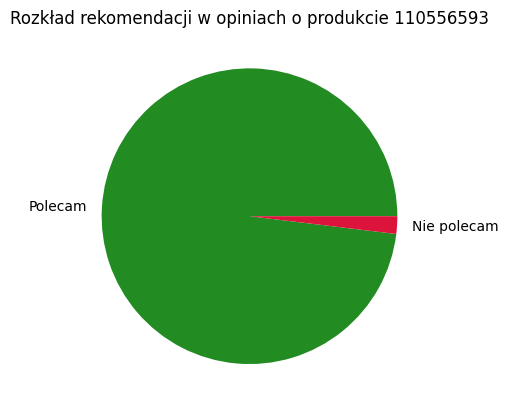

In [50]:

recommendation.plot.pie(
    label="",
    title = f"Rozkład rekomendacji w opiniach o produkcie {product_id}",
    labels = ["Nie polecam", "Polecam", "Nie mam zdania"]
    colors = ["forestgreen", "crimson"]
    )